<font size="6">__Business Case 3 - Recommender System__</font>

- Emanuele Aldera, m20210617
- Robin Schmidt, m20210602
- Muhammad Abdullah, m20210655
- Rui Ramos, m20210640

# Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil 

In [2]:
data_orig = pd.read_csv("retail.csv")
data_orig

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
data = data_orig.copy()

# Plot Functions

In [4]:
def pairwise_relation(data, features = data.select_dtypes(include=np.number).set_index(data.index).columns,
 title = "Pairwise Relationship of Metric Variables"):
    
    # Pairwise Relationship of Numerical Variables
    sns.set(style='white')

    # Setting pairplot
    sns.pairplot(data[features], diag_kind="hist")

    # Layout
    plt.subplots_adjust(top=0.95)
    plt.suptitle(title)

    plt.show()

# Data Exploration

In [5]:
data.isna().sum(axis = 0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data_mv = data.copy()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data["Year"] = data["InvoiceDate"].dt.year
data["Month"] = data["InvoiceDate"].dt.month
data["MonthName"] = data["InvoiceDate"].dt.month_name()
data["Day"] = data["InvoiceDate"].dt.day
data["Weekday"] = data["InvoiceDate"].dt.weekday +1
data["WeekdayName"] = data["InvoiceDate"].dt.day_name()
data["IsWeekend"] = data["Weekday"] > 5
data["Time"] = data["InvoiceDate"].dt.time
data["Hour"] = data["InvoiceDate"].dt.hour

In [9]:
prods = pd.DataFrame({'hour':range(1, 25)})

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
prods['session'] = pd.cut(prods['hour'], bins=b, labels=l, include_lowest=True)

In [10]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [11]:
data["DayTime"] = data['Hour'].apply(f)

In [12]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthName,Day,Weekday,WeekdayName,IsWeekend,Time,Hour,DayTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,December,1,3,Wednesday,False,08:26:00,8,Early Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,3,Wednesday,False,08:26:00,8,Early Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,December,1,3,Wednesday,False,08:26:00,8,Early Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,3,Wednesday,False,08:26:00,8,Early Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,3,Wednesday,False,08:26:00,8,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,December,9,5,Friday,False,12:50:00,12,Morning
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,December,9,5,Friday,False,12:50:00,12,Morning
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,December,9,5,Friday,False,12:50:00,12,Morning
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,December,9,5,Friday,False,12:50:00,12,Morning


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Year         541909 non-null  int64         
 9   Month        541909 non-null  int64         
 10  MonthName    541909 non-null  object        
 11  Day          541909 non-null  int64         
 12  Weekday      541909 non-null  int64         
 13  WeekdayName  541909 non-null  object        
 14  IsWeekend    541909 non-null  bool          
 15  Time         541909 non-null  obje

## Duplicates

In [14]:
data_dup = data.copy()
print("Percentage of suspect duplicated data: " , (data_dup.duplicated().sum() / len(data)) * 100)

Percentage of suspect duplicated data:  0.9721189350979592


In [15]:
duplicates = data_dup.loc[data_dup.duplicated()]
duplicates = duplicates.groupby(duplicates.columns.tolist(),as_index=False).size().sort_values("size", ascending = False)
size = duplicates.pop("size")
duplicates.insert(0, "size", size)
duplicates

,size,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthName,Day,Weekday,WeekdayName,IsWeekend,Time,Hour,DayTime
1596,19,555524,22698,PINK REGENCY TEACUP AND SAUCER,1,2011-06-05 11:37:00,2.95,16923.0,United Kingdom,2011,6,June,5,7,Sunday,True,11:37:00,11,Morning
1595,11,555524,22697,GREEN REGENCY TEACUP AND SAUCER,1,2011-06-05 11:37:00,2.95,16923.0,United Kingdom,2011,6,June,5,7,Sunday,True,11:37:00,11,Morning
3171,7,572861,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-10-26 12:46:00,1.25,14102.0,United Kingdom,2011,10,October,26,3,Wednesday,False,12:46:00,12,Morning
3115,5,572344,M,Manual,48,2011-10-24 10:43:00,1.50,14607.0,United Kingdom,2011,10,October,24,1,Monday,False,10:43:00,10,Morning
470,5,540524,21756,BATH BUILDING BLOCK WORD,1,2011-01-09 12:53:00,5.95,16735.0,United Kingdom,2011,1,January,9,7,Sunday,True,12:53:00,12,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1,556484,22429,ENAMEL MEASURING JUG CREAM,1,2011-06-12 13:17:00,4.25,16938.0,United Kingdom,2011,6,June,12,7,Sunday,True,13:17:00,13,Noon
1666,1,556484,22326,ROUND SNACK BOXES SET OF4 WOODLAND,2,2011-06-12 13:17:00,2.95,16938.0,United Kingdom,2011,6,June,12,7,Sunday,True,13:17:00,13,Noon
1665,1,556484,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-06-12 13:17:00,4.95,16938.0,United Kingdom,2011,6,June,12,7,Sunday,True,13:17:00,13,Noon
1664,1,556481,23182,TOILET SIGN OCCUPIED OR VACANT,3,2011-06-12 13:00:00,0.83,16115.0,United Kingdom,2011,6,June,12,7,Sunday,True,13:00:00,13,Noon


## Visual Exploration

In [16]:
numeric_features = data.select_dtypes(include=np.number).set_index(data.index).columns.tolist()
data[numeric_features]

,Quantity,UnitPrice,CustomerID,Year,Month,Day,Weekday,Hour
0,6,2.55,17850.0,2010,12,1,3,8
1,6,3.39,17850.0,2010,12,1,3,8
2,8,2.75,17850.0,2010,12,1,3,8
3,6,3.39,17850.0,2010,12,1,3,8
4,6,3.39,17850.0,2010,12,1,3,8
...,...,...,...,...,...,...,...,...
541904,12,0.85,12680.0,2011,12,9,5,12
541905,6,2.10,12680.0,2011,12,9,5,12
541906,4,4.15,12680.0,2011,12,9,5,12
541907,4,4.15,12680.0,2011,12,9,5,12


In [17]:
# def cor_heatmap(cor):
#     plt.figure(figsize=(20,20))
#     sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
#     plt.show()
    
# cor_heatmap(np.round(data.corr(method = 'spearman'),3))

In [18]:
def boxplot (data):
    from math import ceil

    metric_features = data.select_dtypes(include=np.number).set_index(data.index).columns
    sns.set()
    
    fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

    
    for ax, feat in zip(axes.flatten(), metric_features): 

        sns.boxplot(data[feat], ax = ax)
        

    
    title = "Numeric Variables' Boxplots"

    plt.suptitle(title)

    plt.show()

C:\Users\scro\anaconda3\envs\programming\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\scro\anaconda3\envs\programming\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\scro\anaconda3\envs\programming\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


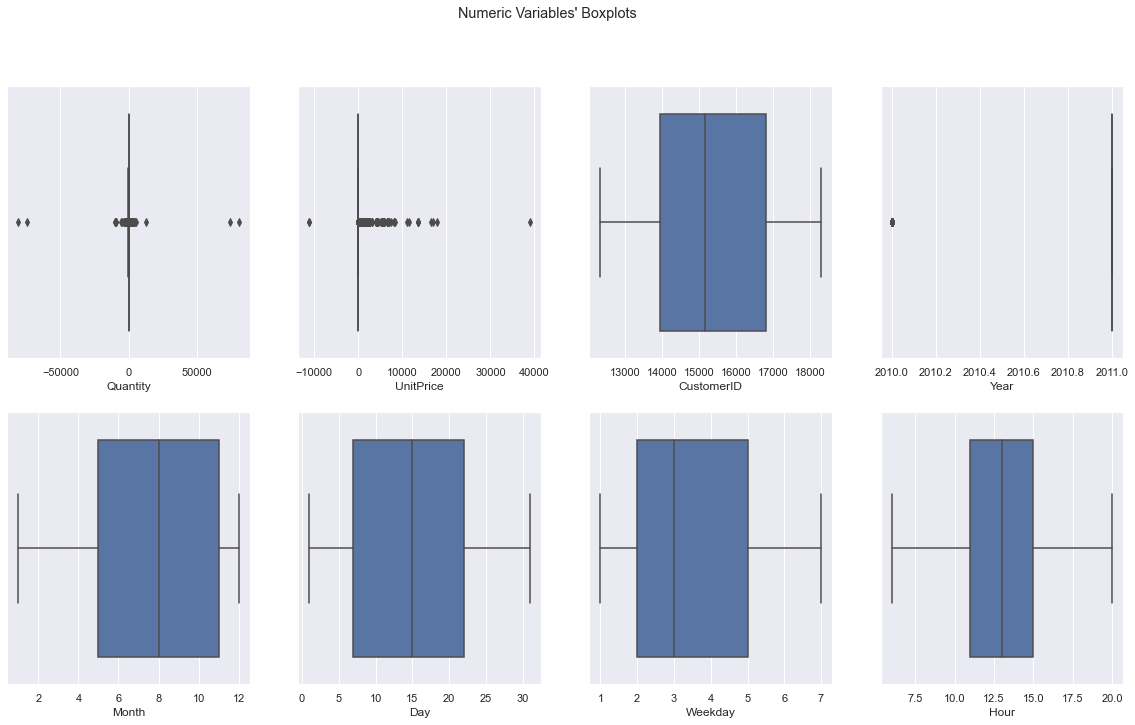

In [19]:
boxplot(data[numeric_features])

In [20]:
data[data["UnitPrice"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthName,Day,Weekday,WeekdayName,IsWeekend,Time,Hour,DayTime
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,2011,8,August,12,5,Friday,False,14:51:00,14,Noon
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,2011,8,August,12,5,Friday,False,14:52:00,14,Noon


In [21]:
data[data["StockCode"].str.len()<5].value_counts("StockCode")

StockCode
POST    1256
DOT      710
M        571
C2       144
D         77
S         63
CRUK      16
PADS       4
B          3
m          1
dtype: int64

In [22]:
data[data["StockCode"].str.len()<5].value_counts("Description")

Description
POSTAGE                       1252
DOTCOM POSTAGE                 709
Manual                         572
CARRIAGE                       143
Discount                        77
SAMPLES                         63
CRUK Commission                 16
PADS TO MATCH ALL CUSHIONS       4
Adjust bad debt                  3
dtype: int64

In [23]:
# StockCodes with less than 5 characters to list to delete
del_stockcodes = data[data["StockCode"].str.len()<5].StockCode.unique().tolist()

In [24]:
data = data[~data["StockCode"].isin(del_stockcodes)]

In [25]:
len(data_orig) - len(data)

2845

In [26]:
data[data["Quantity"]<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthName,Day,Weekday,WeekdayName,IsWeekend,Time,Hour,DayTime
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,12,December,1,3,Wednesday,False,09:49:00,9,Morning
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,December,1,3,Wednesday,False,10:24:00,10,Morning
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,December,1,3,Wednesday,False,10:24:00,10,Morning
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,December,1,3,Wednesday,False,10:24:00,10,Morning
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,December,1,3,Wednesday,False,10:24:00,10,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,2011,12,December,9,5,Friday,False,09:57:00,9,Morning
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,12,December,9,5,Friday,False,09:57:00,9,Morning
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,12,December,9,5,Friday,False,11:57:00,11,Morning
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,12,December,9,5,Friday,False,11:58:00,11,Morning


In [27]:
data[data["CustomerID"]==17548.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthName,Day,Weekday,WeekdayName,IsWeekend,Time,Hour,DayTime
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,December,1,3,Wednesday,False,10:24:00,10,Morning
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,December,1,3,Wednesday,False,10:24:00,10,Morning
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,December,1,3,Wednesday,False,10:24:00,10,Morning
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,December,1,3,Wednesday,False,10:24:00,10,Morning
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,2010,12,December,1,3,Wednesday,False,10:24:00,10,Morning
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,December,1,3,Wednesday,False,10:24:00,10,Morning
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,December,1,3,Wednesday,False,10:24:00,10,Morning
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,2011-04-20 12:01:00,1.25,17548.0,United Kingdom,2011,4,April,20,3,Wednesday,False,12:01:00,12,Morning
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom,2011,4,April,20,3,Wednesday,False,12:01:00,12,Morning
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom,2011,4,April,20,3,Wednesday,False,12:01:00,12,Morning


In [28]:
data_dup = data[["StockCode","Quantity","UnitPrice","CustomerID"]]

In [29]:
data_dup["NegativeQuantity"] = data_dup["Quantity"] < 0

C:\Users\scro\AppData\Local\Temp\ipykernel_4756\4108657375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dup["NegativeQuantity"] = data_dup["Quantity"] < 0


In [41]:
data_dup.value_counts("NegativeQuantity")

NegativeQuantity
False    528967
True      10097
dtype: int64

In [31]:
data_dup["Quantity"] = data_dup["Quantity"].abs()

C:\Users\scro\AppData\Local\Temp\ipykernel_4756\3399105752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dup["Quantity"] = data_dup["Quantity"].abs()


In [75]:
data_pos = data_dup[data_dup["NegativeQuantity"]==False]
data_pos = data_pos.drop("NegativeQuantity",axis=1)
data_pos

,StockCode,Quantity,UnitPrice,CustomerID
0,85123A,6,2.55,17850.0
1,71053,6,3.39,17850.0
2,84406B,8,2.75,17850.0
3,84029G,6,3.39,17850.0
4,84029E,6,3.39,17850.0
...,...,...,...,...
541904,22613,12,0.85,12680.0
541905,22899,6,2.10,12680.0
541906,23254,4,4.15,12680.0
541907,23255,4,4.15,12680.0


In [69]:
data_pos[data_pos["CustomerID"] == 12472.0]

,StockCode,Quantity,UnitPrice,CustomerID,index_orig
9373,22781,2,7.65,12472.0,9373
9374,22865,24,2.10,12472.0,9374
9375,22960,12,3.75,12472.0,9375
9376,22961,12,1.45,12472.0,9376
9377,22962,24,0.85,12472.0,9377
...,...,...,...,...,...
446237,23571,12,1.65,12472.0,446237
446238,23570,12,1.25,12472.0,446238
446239,23084,48,1.79,12472.0,446239
446240,21914,12,1.25,12472.0,446240


In [76]:
data_neg = data_dup[data_dup["NegativeQuantity"]==True]
data_neg = data_neg.drop("NegativeQuantity",axis=1)
data_neg

,StockCode,Quantity,UnitPrice,CustomerID
154,35004C,1,4.65,15311.0
235,22556,12,1.65,17548.0
236,21984,24,0.29,17548.0
237,21983,24,0.29,17548.0
238,21980,24,0.29,17548.0
...,...,...,...,...
540448,22178,12,1.95,14397.0
540449,23144,11,0.83,14397.0
541715,21258,5,10.95,15311.0
541716,84978,1,1.25,17315.0


In [79]:
data_merge = pd.merge(data_neg, data_pos, how="inner")

In [80]:
data_merge

,StockCode,Quantity,UnitPrice,CustomerID
0,22355,2,0.85,17841.0
1,22355,2,0.85,17841.0
2,22355,2,0.85,17841.0
3,22355,2,0.85,17841.0
4,22355,2,0.85,17841.0
...,...,...,...,...
5853,23462,1,19.95,12476.0
5854,85127,5,4.95,12476.0
5855,16219,48,0.06,12985.0
5856,21642,72,0.29,12985.0


In [32]:
data[data["Quantity"]<1].isna().sum(axis = 0)

InvoiceNo         0
StockCode         0
Description     862
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1558
Country           0
Year              0
Month             0
MonthName         0
Day               0
Weekday           0
WeekdayName       0
IsWeekend         0
Time              0
Hour              0
DayTime           0
dtype: int64

In [33]:
data.groupby("CustomerID").count()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,MonthName,Day,Weekday,WeekdayName,IsWeekend,Time,Hour,DayTime
CustomerID,,,,,,,,,,,,,,,,,
12346.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
12347.0,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182
12348.0,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
12349.0,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
12350.0,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
18281.0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
18282.0,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
